In [75]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from datetime import datetime

In [76]:
import sys

sys.path.append(r'C:\Users\simle\OneDrive\Documents\Apexon\MLFlow')

from Data_Ingestion import Maintenance as m

In [77]:
dt = m.dt

In [78]:
print(dt.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]   
0    1     M14860    M                298.1                    308.6  \
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type   
0                    1551         42.8                0       0   No Failure  \
1                    1408         46.3                3       0   No Failure   
2                    1498         49.4                5       0   No Failure   
3                    1433         39.5                7       0   No Failure   
4                    1408         40.0                9       0   No Failure   

                                             Comment Discovery Date   
0     Breast ca

In [79]:
dt=dt.drop(['Unnamed: 18','Unnamed: 19'],axis=1)

dt.describe().T

In [81]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
 10  Comment                  10000 non-null  object 
 11  Discovery Date           10000 non-null  object 
 12  Status Date              10000 non-null  object 
 13  Due Date                 10000 non-null  object 
 14  Priority               

In [82]:
dt['Due Date'] = pd.to_datetime(dt['Due Date'],format='%m/%d/%Y')
dt['Discovery Date'] = pd.to_datetime(dt['Discovery Date'],format='%m/%d/%Y')

In [83]:
dt['Diagnosis_Day_Diff'] = (dt['Due Date'] - dt['Discovery Date']).dt.days

In [84]:
print(dt)

        UDI Product ID Type  Air temperature [K]  Process temperature [K]   
0         1     M14860    M                298.1                    308.6  \
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target   
0    

In [90]:
dt_knn_col = dt[['Priority','Affected Facility','Identification Source','Significance']]

In [91]:
print(dt_knn_col)

     Priority Affected Facility Identification Source Significance
0           B                ad    Project Management       medium
1           C                ad    Project Management       medium
2           B                ac           Maintenance          low
3           B                ab           Maintenance       medium
4           D                ad    Project Management         high
...       ...               ...                   ...          ...
9995        A                ab    Project Management          low
9996        B                aa           Maintenance          low
9997        D                ac              Engineer         high
9998        B                ad              Engineer       medium
9999        B                ad           Maintenance       medium

[10000 rows x 4 columns]


<Axes: xlabel='Significance'>

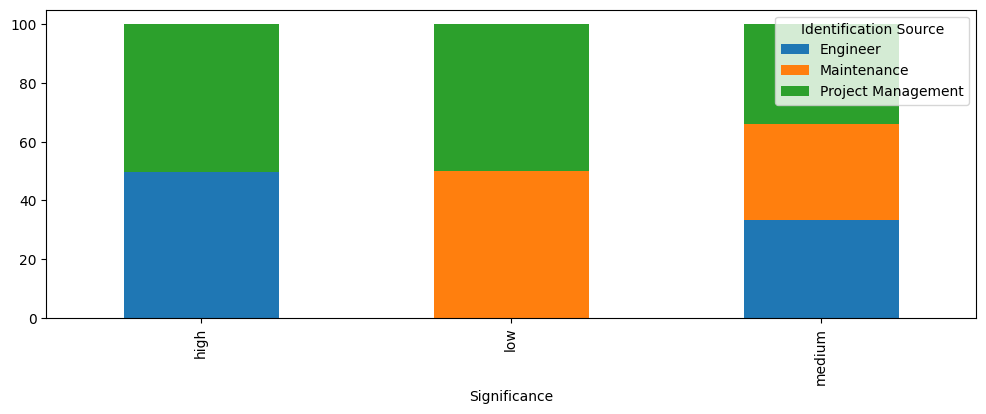

In [98]:
(pd.crosstab(dt['Significance'], dt['Identification Source'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 4), stacked = True)

In [ ]:
print(dt_knn_col)

In [102]:
dt_knn_col.to_csv(r'C:\Users\simle\OneDrive\Documents\Apexon\MLFlow\Preporcessing_Frameworks\KNN.csv')